# <span style="color:maroon"> Breast Cancer Prediction</span>

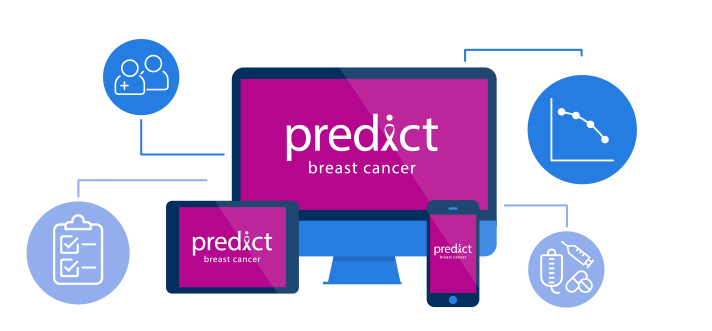

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Read Data using pandas**

In [ ]:
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [ ]:
data.head()

In [ ]:
data.shape

**Checking for missing values**

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma' )

Luckily we don't have missing values in it!!!!

**Converting Categorical to Numerical Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data.diagnosis) 

In [ ]:
data.shape

In [ ]:
data.drop('Unnamed: 32', axis = 1, inplace = True)

**Finding correlation between features**

In [ ]:
cor = data.corr()
sns.heatmap(cor, annot = False, center= 0)
plt.show()

**Checking for Outliers using Zscore method**

Normal Distribution defines the law of nature. Though there are many techniques to detect "wilds" in the dataset. Here I am using Zscore method:

Where Z is the standard normal variate. And Zscore is defined as (X-mean)/SD. 
The area under the bell-shaped curve of Standard normal distribution lies within 3*Sigma limit. 
The values which are beyond the limits are treated as outliers. 


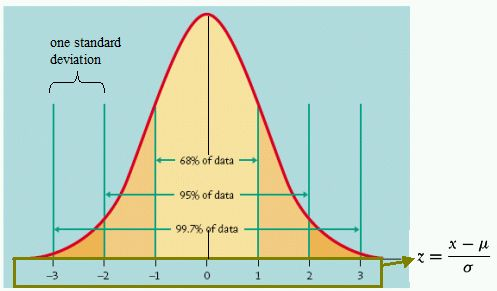

In [ ]:
from scipy.stats import zscore
z_scores = zscore(data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_data = data[filtered_entries]
df = pd.DataFrame(new_data)
df

**Multicollinearity**
When features are correlated then the coefficient of Determination for the defined model increases which affects the prediction accuracy. 
This problem is treated as a critical problem because it can mislead the prediction i.e a person having cancer will be predicted as negative which is a serious matter. 
So here we check if some features are  correlated. 

**Variance Inflation Method**
VIF is a very popular method to detect the multicollinearity which is one of the assumption under regression model. 
The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df.iloc[:,:]
calculate_vif(X)

**Sufficiency**

We try to keep sufficient features in the model which is one of characteristics of a good estimator. 
Since, area and perimeter can be calculated by using radius we can drop these features from the model. 

In [ ]:
drop_cols = ['perimeter_mean','area_mean','perimeter_se','area_se','perimeter_worst','area_worst','id']

In [ ]:
df.drop(drop_cols, axis = 1, inplace = True)

In [ ]:
df.head()

In [ ]:
X = df.drop('diagnosis', axis = 1)                # Defining X and y variables
y = df['diagnosis']

**Import necessary libraries for the prediction**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Prediction using Logistic Regression**

In [ ]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

lm_accuracy = round(lm.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', lm_accuracy)

**Prediction using KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_accuracy = round(knn.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', knn_accuracy)

**Prediction using Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

dt_accuracy = round(dt.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', dt_accuracy)

**Prediction using Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_accuracy = round(rf.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', rf_accuracy)

**Prediction using XGBoost**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_accuracy = round(xgb.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', xgb_accuracy)

**Conclusion**
There is no perfect algorithm for a dataset. For the cancer prediction problem (a classification problem), XGBoost is found to give better accuracy on test data. 
The model is built after removing the outliers and correlated data. 

**Any Suggestions are most Welcome!**
